# Dictionaries

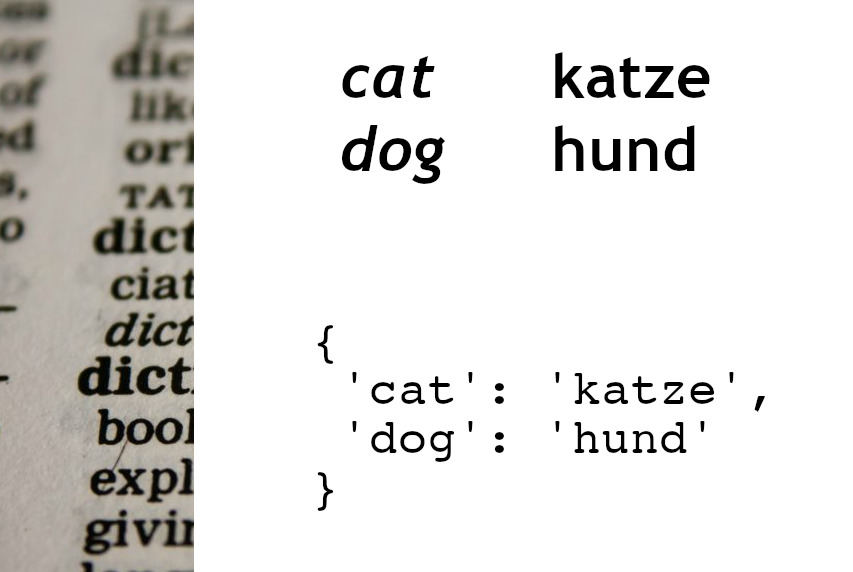

## Basics
A key-value storage (synonims: mapping, association). Highly efficient data structure. Key order not guaranteed (if you need order, checkout [OrderedDict](https://docs.python.org/3/library/collections.html#collections.OrderedDict)). Keys must be hashable.

In [2]:
{'name': 'Yuri', 'surname': 'Pimenov'}

{'name': 'Yuri', 'surname': 'Pimenov'}

Same result using `dict()` constructor

In [2]:
dict(name='Yuri', surname='Pimenov')

{'name': 'Yuri', 'surname': 'Pimenov'}

To access a value stored in a dictionary using the key:

In [3]:
car = {
    'brand': 'BMW',
    'mileage': 100000,
}

car['brand']

'BMW'

To see how many elements are stored in a dictionary:

In [4]:
len(car)

2

If key doesn't exist, produces exception `KeyError: 'weight'`

In [5]:
car['weight']

KeyError: 'weight'

"Safe" version of element access, returns second parameter if key not found:

In [6]:
car.get('weight', 1000)

1000

To check if key exists:

In [7]:
'brand' in car

True

In [8]:
'weight' in car

False

## Hashability

Internally Python computes a value called **hash** for each key about to be inserted and this value is actually used to lookup keys afterwards.

Hash is a big number that can be computed for any value. And it's deterministic: if value is the same, hash is the same. If values differ then hashes will differ too (except on hash collisions).

In [55]:
# example
print hash("Just a string")
print hash("Just a string")
print hash("Just a string!")

8206942937210477431
8206942937210477431
-7327098164158077759


Keys must be hashable, this won't work: `TypeError: unhashable type: 'list'`

[Why Lists Can't Be Dictionary Keys](https://wiki.python.org/moin/DictionaryKeys). Lists (or any other mutable type) can't be hashed:
  * from reference (like `hash(id(...))`) because two eqiuvalent lists wouldn't produce two equivalent hash values
  * from value because mutable types often change contents and thus should be rehashed every time (performance hit + lookup and update references)

In [9]:
d = {}
x = [1]
d[x] = 'value'

TypeError: unhashable type: 'list'

However this works (because tuples are immutable and allow hashing):

In [10]:
d = {}
x = (1, )
d[x] = 'value'
d

{(1,): 'value'}

Caveat: some values produce same hash value.

In [71]:
print hash(True)
print hash(1)
print hash(1.0)

1
1
1


In [72]:
print hash(False)
print hash(0)

0
0


So this is not surprising:

In [75]:
d = {
    True: 'Was True',
    False: 'Was False',
    1: 'Was One',
    0: 'Was Zero'
}

d

{False: 'Was Zero', True: 'Was One'}

In [78]:
d[1], d[True]

('Was One', 'Was One')

## Popular methods of dict()

Dictionaries can also be created from a `[key-value-pair, ...]` list like so:

In [11]:
list_of_pairs = [
    ('A', 1),
    ('B', 2),
    ('C', 3)
]

dict(list_of_pairs)

{'A': 1, 'B': 2, 'C': 3}

We usually do that with `zip()`:

In [56]:
print list(zip('ABCDE', 'VWXYZ'))
print dict(zip('ABCDE', 'VWXYZ'))

[('A', 'V'), ('B', 'W'), ('C', 'X'), ('D', 'Y'), ('E', 'Z')]
{'A': 'V', 'C': 'X', 'B': 'W', 'E': 'Z', 'D': 'Y'}


Btw, this is where `enumerate()` is also useful:

In [13]:
print list(enumerate(['apple', 'orange', 'tomato']))
print dict(enumerate(['apple', 'orange', 'tomato']))

[(0, 'apple'), (1, 'orange'), (2, 'tomato')]
{0: 'apple', 1: 'orange', 2: 'tomato'}


Reverse operation. Coerce dict to list of pairs.

In [14]:
d = {'A': 0, 'C': 2, 'B': 1, 'E': 4, 'D': 3}

d.items()

[('A', 0), ('C', 2), ('B', 1), ('E', 4), ('D', 3)]

Coercing to list returns keys

In [15]:
car = {
    'brand': 'BMW',
    'mileage': 100000,
}

list(car)

['brand', 'mileage']

Same effect can be achieved by calling dict's method `keys()`

In [16]:
car.keys()

['brand', 'mileage']

Dict's method `values()` returns the list of values accordingly.

In [17]:
car.values()

['BMW', 100000]

To add or update an item use `d[key] = new_value` syntax. Here, 'color' key with value 'blue' is added. If key exists in the dict, value will be replaced.

In [18]:
car['color'] = 'blue'
car

{'brand': 'BMW', 'color': 'blue', 'mileage': 100000}

To merge two dictionaries (update multiple items)

In [19]:
car.update({'year': 2007, 'doors': 2})
car

{'brand': 'BMW', 'color': 'blue', 'doors': 2, 'mileage': 100000, 'year': 2007}

To delete an item

In [20]:
del car['brand']
car

{'color': 'blue', 'doors': 2, 'mileage': 100000, 'year': 2007}

To copy a dictionary:

In [2]:
d1 = {'a': 1, 'b': 2}
d2 = d1.copy()
d1 is d2

False

## Dict comprehensions

Just like list comprehensions, but:
 * defined using curly braces: `{ ... }`
 * requires **key and value** to create an item
 * syntax is `{ key: value ... }`

Example of using dict comprehension instead of just `dict(list_of_pairs)`:

In [59]:
{k: v for k, v in [('A', 1), ('B', 2), ('C', 3)]}

{'A': 1, 'B': 2, 'C': 3}

Example: double the salary of each pirate:

In [66]:
crew = {
    'Jack Sparrow': 100,
    'Hector Barbossa': 50,
    'Will Turner': 10
}

{k: v * 2 for k, v in crew.items()}

{'Hector Barbossa': 100, 'Jack Sparrow': 200, 'Will Turner': 20}

Example: swap keys and values.

In [67]:
{v: k for k, v in crew.items()}

{10: 'Will Turner', 50: 'Hector Barbossa', 100: 'Jack Sparrow'}

Example: filter using a dict comprehension:

In [68]:
guests = {
    'John': 'boy',
    'Brad': 'boy',
    'Anna': 'girl',
    'Kate': 'girl',
    'Tom': 'cat',
    'Jerry': 'mouse'
}

{k: v for k, v in guests.items() if v == 'girl'}

{'Anna': 'girl', 'Kate': 'girl'}

## Complex structures

List, dict etc are containers and can contain about anything and of course other containers as well representing complex structures. Level of nesting is unlimited and depends only on how much memory is available.

For example: list of dict's:

In [30]:
d1 = dict(legs=4, sounds='Meow')
d2 = dict(in_water=True, sounds=None)
d3 = dict(legs=2, sounds='Blabla')

animals = [d1, d2, d3]
animals

[{'legs': 4, 'sounds': 'Meow'},
 {'in_water': True, 'sounds': None},
 {'legs': 2, 'sounds': 'Blabla'}]

Or dict of dicts:

In [31]:
zoo = {
    'cat': d1,
    'fish': d2,
    'human': d3
}

zoo

{'cat': {'legs': 4, 'sounds': 'Meow'},
 'fish': {'in_water': True, 'sounds': None},
 'human': {'legs': 2, 'sounds': 'Blabla'}}